In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

In [4]:
#fetching the data and converting the target to type int from string
data = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)
pixel_values, targets = data
targets = targets.astype(int)

In [13]:
pixel_values[1, :].shape

(70000,)

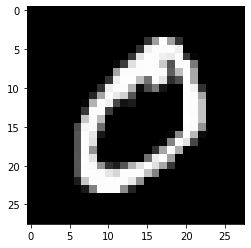

In [23]:
'''pixel_values is a 2-dimensional array of shape 7000x784.
There are 7000 images with each of size 28x28, 
flattening 28x28 gives 784 data points'''

#visualising the samples by reshaping them to their original shape and plotting them
single_image = pixel_values[1, :].reshape(28, 28)
plt.imshow(single_image, cmap='gray')


In [28]:
#create t-SNE transformation of the data

tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000, :])

In [29]:
transformed_data.shape

(3000, 2)

In [30]:
tsne_df = pd.DataFrame(
            np.column_stack((transformed_data, targets[:3000])),
            columns=["x", "y", "targets"]
)

tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

In [31]:
tsne_df.head()

,x,y,targets
0,-5.281551,-28.952768,5
1,-26.105896,-68.069321,0
2,-42.503582,35.580391,4
3,38.893967,26.663395,1
4,-14.770573,35.433247,9


C:\Users\Rakesh Raj\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


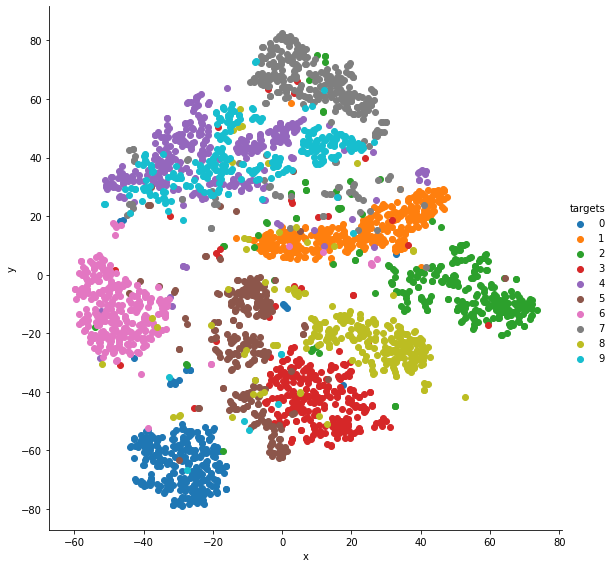

In [32]:
#plot using seaborn and matplotlib

grid = sns.FacetGrid(tsne_df, hue="targets", size=8)
grid.map(plt.scatter, "x", "y").add_legend()

In [34]:
#create t-SNE transformation of the data

tsne = manifold.TSNE(n_components=3, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000, :])

transformed_data.shape

(3000, 3)

In [36]:
tsne_df = pd.DataFrame(
            np.column_stack((transformed_data, targets[:3000])),
            columns=["x", "y", "z", "targets"]
)

tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

In [37]:
tsne_df.head()

,x,y,z,targets
0,-2.701941,-8.191429,5.949618,5
1,-18.494036,-7.110244,9.272565,0
2,-8.987993,-6.410541,-13.644184,4
3,17.942228,7.170067,1.603114,1
4,-1.166681,0.304352,-7.207404,9


C:\Users\Rakesh Raj\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Rakesh Raj\anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


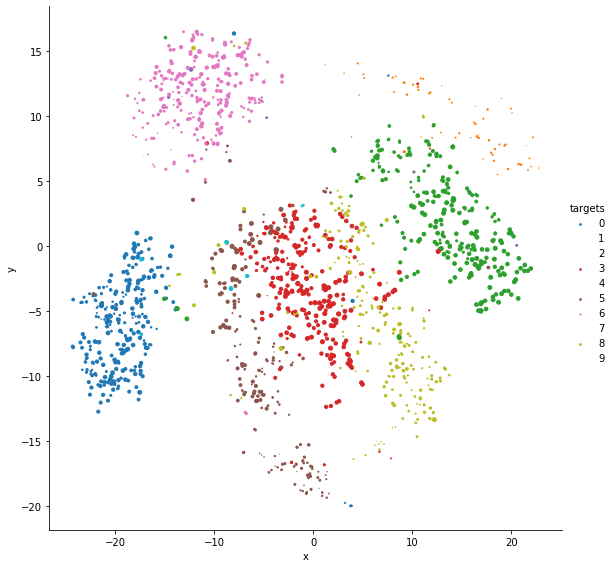

In [38]:
#plot using seaborn and matplotlib

grid = sns.FacetGrid(tsne_df, hue="targets", size=8)
grid.map(plt.scatter, "x", "y", "z").add_legend()